# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [7]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [17]:
len(df.index)
df = df.head(30000)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29939 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           30000 non-null  object        
 4   Secondary Breed         3988 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

**Answer:** Each row pertains to a registered dog. `Animal Name` refers to the name of the animal, and `Owner Zip Code` shows where it was registered.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

**Answer:**
1. What percentage of the dogs on the list were vaccinated?
2. What percentage of the dogs on the list were spayed or neutered?
3. What are the most popular dog breeds on the list?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: ylabel='Primary Breed'>

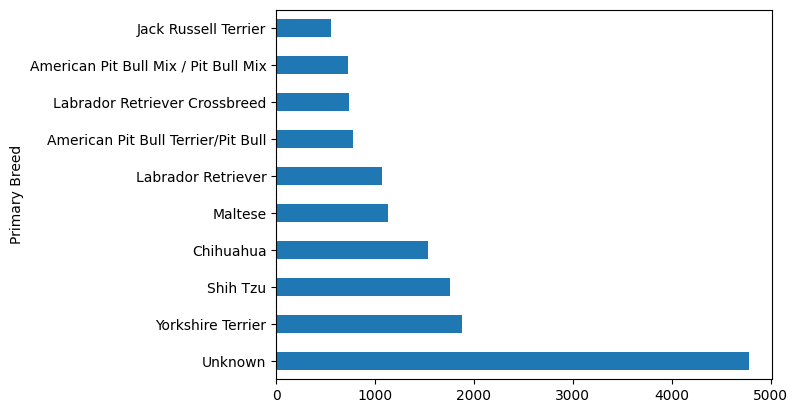

In [41]:
df['Primary Breed'].value_counts().head(10).plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

<Axes: ylabel='Primary Breed'>

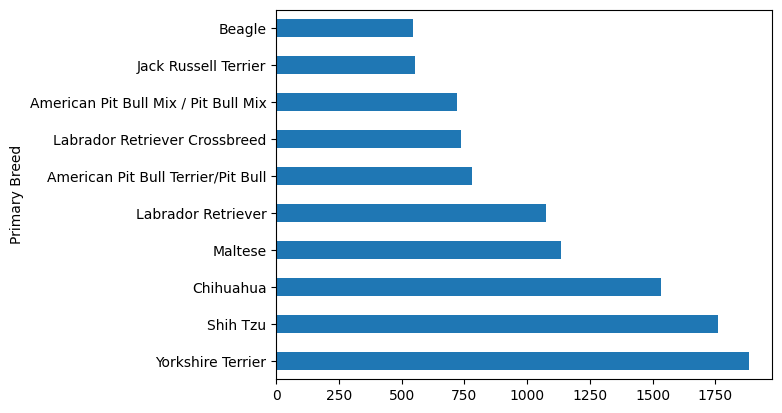

In [48]:
df['Primary Breed'][df['Primary Breed'] != 'Unknown'].value_counts().head(10).plot(kind='barh')

## What are the most popular dog names?

In [71]:
df['Animal Name'][df['Animal Name'].str.lower() != "unknown"].value_counts()

Animal Name
Max              202
Bella            193
Charlie          172
Lola             146
Rocky            140
                ... 
Bluno              1
DARBY              1
CHARLEY VIVAR      1
TINY               1
Squeeze            1
Name: count, Length: 13715, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [331]:
cherry = df['Animal Name'][df['Animal Name'].str.lower() == 'cherry']
cherry.count()

5

In [170]:
max = df['Animal Name'][df['Animal Name'].str.lower() == 'max']
max.count()

256

In [171]:
maxwell = df['Animal Name'][df['Animal Name'].str.lower() == 'maxwell']
maxwell.count()

13

## What percentage of dogs are guard dogs?

In [90]:
df['Guard or Trained'].value_counts(normalize=True).mul(100)

Guard or Trained
No     99.914254
Yes     0.085746
Name: proportion, dtype: float64

## What are the actual numbers?

In [91]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [92]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [97]:
df['Guard or Trained'].fillna('No', inplace=True)
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [249]:
df.replace(['Unknown', 'unknown', 'UNKNOWN', 'NO NAME'], pd.NA, inplace=True)
df[df['Guard or Trained'].str.lower() == 'yes'].value_counts('Primary Breed')

Primary Breed
German Shepherd Dog           3
Doberman Pinscher             1
German Shepherd Crossbreed    1
Golden Retriever              1
Labrador Retriever            1
Poodle, Standard              1
Rottweiler                    1
Schnauzer, Miniature          1
Shih Tzu                      1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [120]:
df['Year'] = df['Animal Birth'].dt.year

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [334]:
df['Age'] = 2024 - df['Year']
df['Age'].mean()

14.712433333333333

# Joining data together

In [335]:
zip = pd.read_csv('zipcodes-neighborhoods.csv')

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [132]:
merged = df.merge(zip, left_on='Owner Zip Code', right_on='zip')

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [250]:
merged.replace(['Unknown', 'unknown', 'UNKNOWN', 'NO NAME'], pd.NA, inplace=True)
merged[merged['borough'] == 'Bronx'].value_counts('Animal Name').head(1)

Animal Name
Bella    22
Name: count, dtype: int64

In [251]:
merged[merged['borough'] == 'Bronx'].value_counts('Animal Name').head(1)

Animal Name
Bella    22
Name: count, dtype: int64

In [252]:
merged[merged['neighborhood'] == 'Upper East Side'].value_counts('Animal Name').head(1)

Animal Name
Charlie    19
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [222]:
merged.groupby('neighborhood')['Primary Breed'].agg(pd.Series.mode)
# `agg(pd.Series.mode)` finds the mode / most common value in filtered columns

neighborhood
Borough Park                                                     Yorkshire Terrier
Bronx Park and Fordham                                           Yorkshire Terrier
Bushwick and Williamsburg                                        Yorkshire Terrier
Canarsie and Flatlands                                                    Shih Tzu
Central Bronx                                                    Yorkshire Terrier
Central Brooklyn                                                          Shih Tzu
Central Harlem                                                           Chihuahua
Central Queens                                                   Yorkshire Terrier
Chelsea and Clinton                                                      Chihuahua
East Harlem                                                      Yorkshire Terrier
East New York and New Lots                                       Yorkshire Terrier
Flatbush                                                                  

In [290]:
# Identifies which dog breeds are the most common, among the most common dog breeds per neighborhood
merged.groupby('neighborhood')['Primary Breed'].agg(pd.Series.mode).value_counts()

Primary Breed
Yorkshire Terrier                                            16
Shih Tzu                                                     12
Chihuahua                                                     7
Labrador Retriever                                            3
Maltese                                                       2
[American Pit Bull Mix / Pit Bull Mix, Yorkshire Terrier]     1
Havanese                                                      1
Name: count, dtype: int64

## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [328]:
# filter by breed
# identify whether spayed / neutered

merged['Primary Breed'][(merged['Spayed or Neut'] == 'No')].value_counts().head(5)

Primary Breed
Yorkshire Terrier                     531
Shih Tzu                              401
Chihuahua                             303
Maltese                               300
American Pit Bull Terrier/Pit Bull    173
Name: count, dtype: int64

In [329]:
# Identifies which breeds are spayed/neutered AND female
# merged[(merged['Spayed or Neut'] == 'Yes') & (merged['Animal Gender'] < 'F')].value_counts('Primary Breed').tail()

# filter by gender
# identify whether spayed / neutered

merged['Animal Gender'][(merged['Spayed or Neut'] == 'No')].value_counts()
# Answer: male dogs are least likely to neutered.

Animal Gender
M    3343
F    1930
Name: count, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

<Axes: ylabel='borough'>

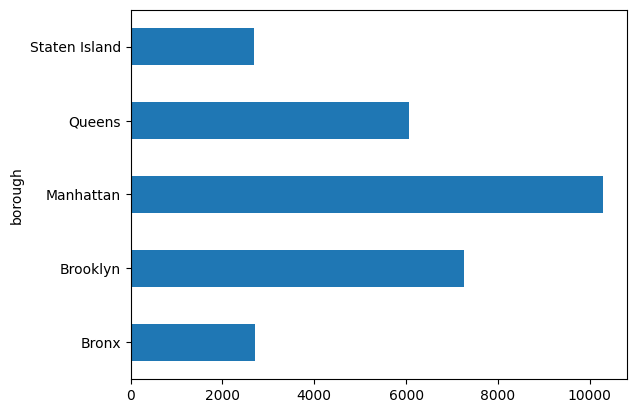

In [256]:
merged.replace(['Unknown', 'unknown', 'UNKNOWN', 'NO NAME'], pd.NA, inplace=True)
# merged.groupby('borough')['Animal Name'].value_counts(dropna=False)
merged.groupby('borough')['Animal Name'].count().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [257]:
nycpop = pd.read_csv('boro_population.csv')

percapita = merged.merge(nycpop, left_on='borough', right_on='borough')

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [277]:
percapita.groupby('borough')['Primary Breed'].value_counts().groupby('borough').head(5)

borough        Primary Breed                     
Bronx          Yorkshire Terrier                     250
               Shih Tzu                              244
               Chihuahua                             208
               American Pit Bull Terrier/Pit Bull    181
               Maltese                               139
Brooklyn       Yorkshire Terrier                     501
               Shih Tzu                              481
               Chihuahua                             391
               Labrador Retriever                    255
               Maltese                               247
Manhattan      Chihuahua                             511
               Yorkshire Terrier                     505
               Shih Tzu                              454
               Labrador Retriever                    422
               Maltese                               332
Queens         Yorkshire Terrier                     434
               Shih Tzu               

<Axes: ylabel='borough'>

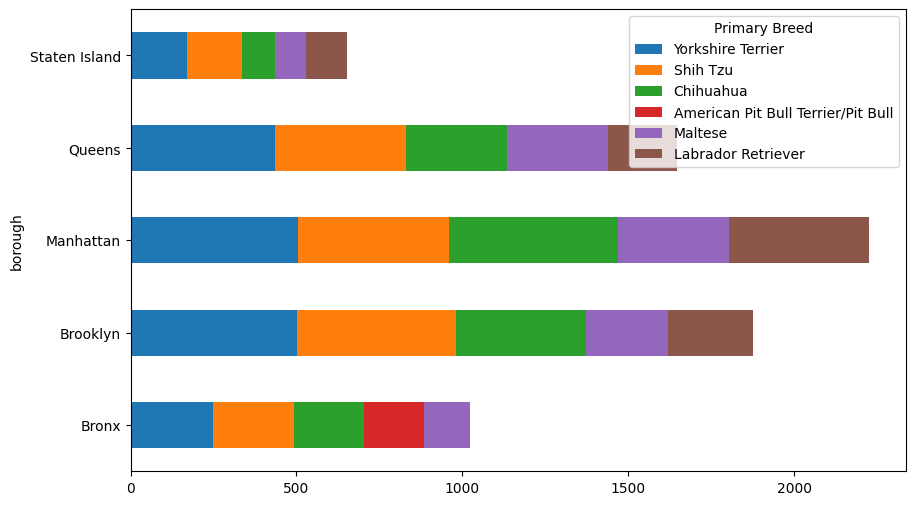

In [336]:
breed_count = percapita.groupby('borough')['Primary Breed'].value_counts().groupby('borough').head(5)
breed_count.unstack().plot(kind='barh', stacked=True, figsize=(10, 6))